In [1]:
import pandas as pd
df = pd.read_csv('DATA.csv',delimiter=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLIENT_VAT           148 non-null    object 
 1   TIMO_ID              35 non-null     float64
 2   AT_KM                6 non-null      float64
 3   CZ_KM                118 non-null    float64
 4   DE_KM                55 non-null     float64
 5   EE_KM                24 non-null     float64
 6   HU_KM                33 non-null     float64
 7   LT_KM                86 non-null     float64
 8   LV_KM                43 non-null     float64
 9   PL_KM                208 non-null    float64
 10  SE_KM                32 non-null     float64
 11  SK_KM                77 non-null     float64
 12  COMPANY_LP           60 non-null     object 
 13  ADRESS_LP            55 non-null     object 
 14  COD_LP               262 non-null    object 
 15  CITY_LP              77 non-null     obj

In [2]:
# Value Complement
df['AT_KM'] = df['AT_KM'].fillna(0)
df['CZ_KM'] = df['CZ_KM'].fillna(0)
df['DE_KM'] = df['DE_KM'].fillna(0)
df['EE_KM'] = df['EE_KM'].fillna(0)
df['HU_KM'] = df['HU_KM'].fillna(0)
df['LT_KM'] = df['LT_KM'].fillna(0)
df['LV_KM'] = df['LV_KM'].fillna(0)
df['PL_KM'] = df['PL_KM'].fillna(0)
df['SE_KM'] = df['SE_KM'].fillna(0)
df['SK_KM'] = df['SK_KM'].fillna(0)
df['EPALE'] = df['EPALE'].fillna(0)
df['TEMP_MIN'] = df['TEMP_MIN'].fillna(-30)
df['TEMP_MAX'] = df['TEMP_MAX'].fillna(30)
df['GOODS_TYPE'] = df['GOODS_TYPE'].fillna('Other')
df['BODY_TYPE'] = df['BODY_TYPE'].fillna('Other')
df['LOAD_UNLOAD_METHOD'] = df['LOAD_UNLOAD_METHOD'].fillna('Other')
df['OTHER_COSTS'] = df['OTHER_COSTS'].fillna(0)
df['QTY_LOADS'] = df['QTY_LOADS'].fillna(1)
df['QTY_DELIVERIES'] = df['QTY_DELIVERIES'].fillna(1)

# Feature Engineering
df["KM"] = df['AT_KM'] + df['CZ_KM'] + df['DE_KM'] + df['EE_KM'] + df['HU_KM'] + df['LT_KM'] + df['LV_KM'] + df['PL_KM'] + df['SE_KM'] + df['SK_KM']
df["TEMP_RANGE"] = df['TEMP_MAX'] - df['TEMP_MIN']
df["EUROforKM"] = df['EURO'] / df['KM']
df["NETTO_EURO"] = df['EURO'] + df['OTHER_COSTS'] # Other costs for example: ferry, tunnel, bridge.
df["NETTO_EuroForKM"] = df['NETTO_EURO'] / df['KM']
df["EuroForKM"] = df['EURO'] / df['KM']
df["ToneKilometer"] = df['KM'] * df['TONS']
df["EuroForToneKilometer"] = df['EURO'] / df["ToneKilometer"]

#Date
df['START_LOAD_DATA_DAY'] = pd.DatetimeIndex(df['START_LOAD_DATA']).day
df['START_LOAD_DATA_WEEKDAY'] = pd.DatetimeIndex(df['START_LOAD_DATA']).weekday
df['START_LOAD_DATA_MONTH'] = pd.DatetimeIndex(df['START_LOAD_DATA']).month
df['START_LOAD_DATA_YEAR'] = pd.DatetimeIndex(df['START_LOAD_DATA']).year

df['END_LOAD_DATA_DAY'] = pd.DatetimeIndex(df['END_LOAD_DATA']).day
df['END_LOAD_DATA_WEEKDAY'] = pd.DatetimeIndex(df['END_LOAD_DATA']).weekday
df['END_LOAD_DATA_MONTH'] = pd.DatetimeIndex(df['END_LOAD_DATA']).month
df['END_LOAD_DATA_YEAR'] = pd.DatetimeIndex(df['START_LOAD_DATA']).year

df['START_DELIVERY_DATA_DAY'] = pd.DatetimeIndex(df['START_DELIVERY_DATA']).day
df['START_DELIVERY_DATA_WEEKDAY'] = pd.DatetimeIndex(df['START_DELIVERY_DATA']).day
df['START_DELIVERY_DATA_MONTH'] = pd.DatetimeIndex(df['START_DELIVERY_DATA']).month
df['START_DELIVERY_DATA_YEAR'] = pd.DatetimeIndex(df['START_DELIVERY_DATA']).year

df['END_DELIVERY_DATA_DAY'] = pd.DatetimeIndex(df['END_DELIVERY_DATA']).day
df['END_DELIVERY_DATA_WEEKDAY'] = pd.DatetimeIndex(df['END_DELIVERY_DATA']).weekday
df['END_DELIVERY_DATA_MONTH'] = pd.DatetimeIndex(df['END_DELIVERY_DATA']).month
df['END_DELIVERY_DATA_YEAR'] = pd.DatetimeIndex(df['END_DELIVERY_DATA']).year

df['START_LOAD_TIME_HOUR'] = pd.DatetimeIndex(df['START_LOAD_TIME']).hour
df['START_LOAD_TIME_MINUTE'] = pd.DatetimeIndex(df['START_LOAD_TIME']).minute

df['END_LOAD_TIME_HOUR'] = pd.DatetimeIndex(df['END_LOAD_TIME']).hour
df['END_LOAD_TIME_MINUTE'] = pd.DatetimeIndex(df['END_LOAD_TIME']).minute

df['START_DELIVERY_TIME_HOUR'] = pd.DatetimeIndex(df['START_DELIVERY_TIME']).hour
df['START_DELIVERY_TIME_MINUTE'] = pd.DatetimeIndex(df['START_DELIVERY_TIME']).minute

df['END_DELIVERY_TIME_HOUR'] = pd.DatetimeIndex(df['END_DELIVERY_TIME']).hour
df['END_DELIVERY_TIME_MINUTE'] = pd.DatetimeIndex(df['END_DELIVERY_TIME']).minute

# Relation:
df["COUNTRY_LOAD_PLACE"] = df["COD_LP"].str[:2]
df["COUNTRY_DELIVERY_PLACE"] = df["COD_DP"].str[:2]
df["Relation"] = df["COD_LP"].str[:2] + ' to ' + df["COD_DP"].str[:2]


df = df[df['KM'] !=0]

#Change false into 0 and true into 1
df = df*1

In [3]:
df["KM"].agg(["mean", "median", "std","min","max"])

mean       817.655172
median     747.000000
std        422.758411
min         20.700000
max       2045.400000
Name: KM, dtype: float64

([<matplotlib.axis.XTick at 0x1f64f8bf280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

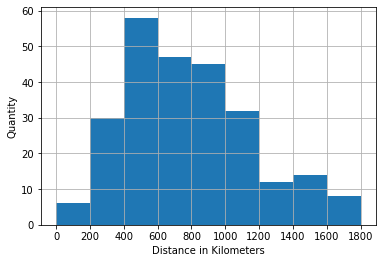

In [4]:
import pylab as pl
import matplotlib.pyplot as plt
df['KM'].hist(bins=[0,200,400,600,800,1000,1200,1400,1600,1800,])
pl.xlabel("Distance in Kilometers")
pl.ylabel("Quantity")
plt.xticks([0,200,400,600,800,1000,1200,1400,1600,1800,])

In [5]:
df["EURO"].agg(["mean", "median", "std","min","max"])

mean       811.982894
median     690.000000
std        527.155750
min         20.000000
max       4300.000000
Name: EURO, dtype: float64

Text(0, 0.5, 'Quantity')

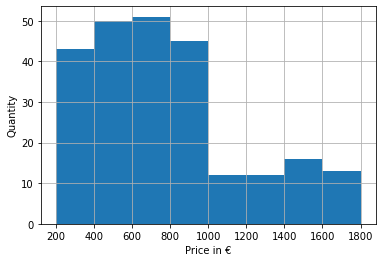

In [53]:
import pylab as pl
df['EURO'].hist(bins=[200,400,600,800,1000,1200,1400,1600,1800])
pl.xlabel("Price in €")
pl.ylabel("Quantity")

In [7]:
df["TONS"].agg(["mean", "median", "std","min","max"])

mean      21.239274
median    24.000000
std        5.134799
min        1.523000
max       25.700000
Name: TONS, dtype: float64

([<matplotlib.axis.XTick at 0x1f6529f6b20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

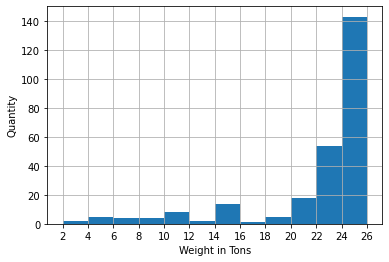

In [51]:
import pylab as pl
df['TONS'].hist(bins=[2,4,6,8,10,12,14,16,18,20,22,24,26])
pl.xlabel("Weight in Tons")
pl.ylabel("Quantity")
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26])

<AxesSubplot:xlabel='KM', ylabel='EURO'>

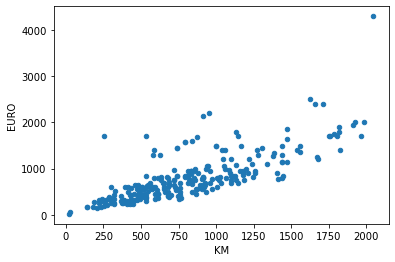

In [9]:
df.plot.scatter(x='KM',y='EURO',)

In [10]:
CorrelationEuroKm = df['EURO'].corr(df['KM'])
CorrelationEuroKm

0.7663354776641822

<AxesSubplot:xlabel='TONS', ylabel='EuroForKM'>

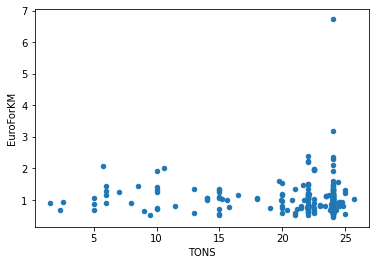

In [11]:
df.plot.scatter(x='TONS',y='EuroForKM',)

In [12]:
Correlation_EuroForToneKilometer_EuroForKM = df['EuroForKM'].corr(df['TONS'])
Correlation_EuroForToneKilometer_EuroForKM

-0.040348379585739315

In [13]:
df["EuroForKM"].agg(["mean", "median", "std","min","max"])

mean      1.028719
median    0.923233
std       0.525208
min       0.464253
max       6.724684
Name: EuroForKM, dtype: float64

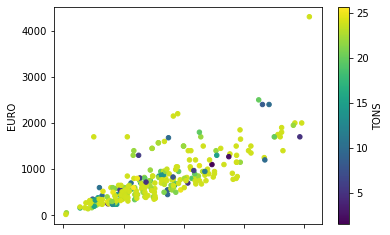

In [14]:
ax2 = df.plot.scatter(x='KM',
                      y='EURO',
                      c='TONS',
                      colormap='viridis')

In [15]:
CorrelationToneKilometer = df['EURO'].corr(df['ToneKilometer'])
CorrelationToneKilometer

0.6514879147839018

In [16]:
df["ToneKilometer"].agg(["mean", "median", "std","min","max"])

mean      17418.105178
median    15895.000000
std       10268.910256
min         496.800000
max       49089.600000
Name: ToneKilometer, dtype: float64

Text(0, 0.5, 'Price in € / Kilometer')

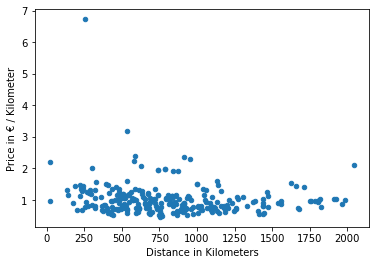

In [17]:
import pylab as pl
df.plot.scatter(x='KM',y='EuroForKM',)
pl.xlabel("Distance in Kilometers")
pl.ylabel("Price in € / Kilometer")

In [18]:
CorrelationKMtoEuroForKM = df['KM'].corr(df['EuroForKM'])
CorrelationKMtoEuroForKM 

-0.13181170212524687

<AxesSubplot:xlabel='TONS', ylabel='EuroForKM'>

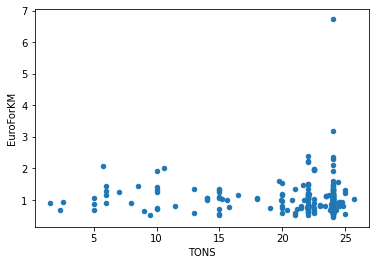

In [19]:
df.plot.scatter(x='TONS',y='EuroForKM',)

In [20]:
CorrelationTONStoEuroForKM = df['TONS'].corr(df['EuroForKM'])
CorrelationTONStoEuroForKM

-0.040348379585739315

([<matplotlib.axis.YTick at 0x1f6508176d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

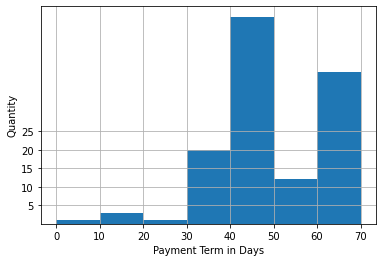

In [21]:
import pylab as pl
df['PAYMENT TERM'].hist(bins=[0,10,20,30,40,50,60,70])
pl.xlabel("Payment Term in Days")
pl.ylabel("Quantity")
plt.xticks([0,10,20,30,40,50,60,70])
plt.yticks([5,10,15,20,25])

In [54]:
df["PAYMENT TERM"].agg(["mean", "median", "std","min","max"])

mean      47.253731
median    45.000000
std       11.704177
min        5.000000
max       60.000000
Name: PAYMENT TERM, dtype: float64

Text(0, 0.5, 'Price in € / Kilometer')

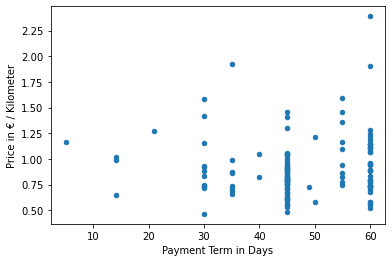

In [22]:
import pylab as pl
df.plot.scatter(x='PAYMENT TERM',y='EuroForKM',)
pl.xlabel("Payment Term in Days")
pl.ylabel("Price in € / Kilometer")

In [23]:
CorrelationPAYMENTTERMtoEuroForKM = df['PAYMENT TERM'].corr(df['EuroForKM'])
CorrelationPAYMENTTERMtoEuroForKM

0.0438988614685164

In [24]:
df['PAYMENT TERM'].unique()

array([nan, 60., 45., 55., 30., 35., 50., 21., 14., 40.,  5., 49.])

In [25]:
df['PAYMENT TERM'].value_counts()

45.0    53
60.0    41
30.0    12
55.0    10
35.0     8
14.0     3
40.0     2
50.0     2
5.0      1
21.0     1
49.0     1
Name: PAYMENT TERM, dtype: int64

In [26]:
dfp = df.groupby(['PAYMENT TERM'], as_index=False).EuroForKM.mean()
dfp.sort_values('PAYMENT TERM')

,PAYMENT TERM,EuroForKM
0,5.0,1.168224
1,14.0,0.886333
2,21.0,1.272984
3,30.0,0.926142
4,35.0,0.931679
5,40.0,0.934679
6,45.0,0.829870
7,49.0,0.727990
8,50.0,0.894431
9,55.0,1.081139


In [27]:
df3 = df.groupby(['END_DELIVERY_DATA_MONTH'],as_index=False).EuroForKM.mean()
df3

,END_DELIVERY_DATA_MONTH,EuroForKM
0,1,0.952802
1,2,1.216984
2,3,1.160887
3,4,1.071336
4,5,1.222371
5,6,0.893375
6,7,0.929287
7,8,1.148490
8,9,0.941008
9,10,0.925523


([<matplotlib.axis.XTick at 0x1f6518ce610>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

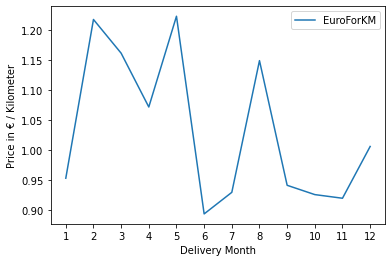

In [28]:
df3.plot.line(x='END_DELIVERY_DATA_MONTH', y='EuroForKM')
pl.xlabel("Delivery Month")
pl.ylabel("Price in € / Kilometer")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

In [29]:
df3b = df.groupby(['END_DELIVERY_DATA_WEEKDAY'],as_index=False).EuroForKM.mean()
df3b

,END_DELIVERY_DATA_WEEKDAY,EuroForKM
0,0,1.001164
1,1,0.957694
2,2,0.970731
3,3,1.027009
4,4,1.202353
5,5,1.103908
6,6,0.973714


([<matplotlib.axis.XTick at 0x1f65194cd30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

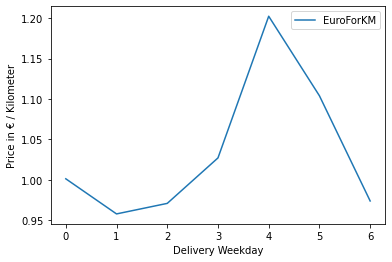

In [30]:
df3b.plot.line(x='END_DELIVERY_DATA_WEEKDAY', y='EuroForKM')
pl.xlabel("Delivery Weekday")
pl.ylabel("Price in € / Kilometer")
plt.xticks([0,1,2,3,4,5,6])

In [31]:
Correlation_QTY_LOADS_to_EuroForKM = df['QTY_LOADS'].corr(df['EuroForKM'])
Correlation_QTY_LOADS_to_EuroForKM

0.01210804039839004

In [32]:
df4 = df.groupby(['QTY_LOADS'], as_index=False).EUROforKM.mean()
df4

,QTY_LOADS,EUROforKM
0,1,1.026810
1,2,1.113588
2,3,1.091370
3,4,0.962032


In [33]:
Correlation_QTY_DELIVERIES_to_EuroForKM = df['QTY_DELIVERIES'].corr(df['EuroForKM'])
Correlation_QTY_DELIVERIES_to_EuroForKM

-0.022700343269770225

In [34]:
df5 = df.groupby(['QTY_DELIVERIES'], as_index=False).EUROforKM.mean()
df5

,QTY_DELIVERIES,EUROforKM
0,1,1.035340
1,2,0.914474
2,3,0.892628
3,4,0.828918
4,6,1.357033


In [35]:
df6 = df.groupby(['COUNTRY_LOAD_PLACE'], as_index=False).EUROforKM.mean()
df6.sort_values('EUROforKM')

,COUNTRY_LOAD_PLACE,EUROforKM
3,HU,0.825605
4,LT,0.891937
2,EE,0.914589
8,SK,0.964332
1,DE,0.982326
7,SE,0.984679
6,PL,1.088258
0,CZ,1.109413
5,LV,1.313607


In [36]:
df7 = df.groupby(['COUNTRY_DELIVERY_PLACE'], as_index=False).EUROforKM.mean()
df7.sort_values('EUROforKM')

,COUNTRY_DELIVERY_PLACE,EUROforKM
6,PL,0.757014
4,LT,0.891655
5,LV,0.956232
0,CZ,1.006087
2,EE,1.035716
8,SK,1.052735
3,HU,1.081175
1,DE,1.137636
7,SE,2.010653


In [37]:
df8 = df.groupby(["Relation"], as_index=False).NETTO_EuroForKM.mean()
df8["Load Country"] = df8["Relation"].str[:2]
df8["Delivery Country"] = df8["Relation"].str[6:8]
df8

,Relation,NETTO_EuroForKM,Load Country,Delivery Country
0,CZ to CZ,1.345211,CZ,CZ
1,CZ to DE,1.419979,CZ,DE
2,CZ to EE,1.086895,CZ,EE
3,CZ to HU,1.161710,CZ,HU
4,CZ to LT,0.819258,CZ,LT
...,...,...,...,...
76,SK to LT,0.781342,SK,LT
77,SK to LV,0.799277,SK,LV
78,SK to PL,0.775352,SK,PL
79,SK to SE,2.351526,SK,SE


In [38]:
del df8['Relation']
df8

,NETTO_EuroForKM,Load Country,Delivery Country
0,1.345211,CZ,CZ
1,1.419979,CZ,DE
2,1.086895,CZ,EE
3,1.161710,CZ,HU
4,0.819258,CZ,LT
...,...,...,...
76,0.781342,SK,LT
77,0.799277,SK,LV
78,0.775352,SK,PL
79,2.351526,SK,SE


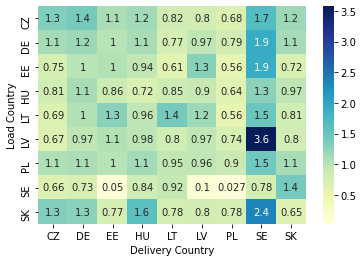

In [39]:
import seaborn as sns
flights = df8
flights = flights.pivot("Load Country", "Delivery Country", "NETTO_EuroForKM")
ax = sns.heatmap(flights, cmap="YlGnBu", annot=True)

In [40]:
df['BODY_TYPE'].unique()

array(['Refrigerator',
       'Box, Thermo, Tautliner, Mega, Refrigerator, Curtain',
       'Tautliner, Mega, Curtain', 'Curtain', 'Refrigerator, Curtain',
       'Thermo, Curtain', 'Thermo, Tautliner, Refrigerator, Curtain',
       'Thermo, Refrigerator, Curtain',
       'Box, Coil trough, Thermo, Tautliner, Mega, Refrigerator, Curtain',
       'Flatbed truck', 'Box, Coil trough, Tautliner, Mega, Curtain',
       'Coil trough', 'Coil trough, Tautliner, Mega, Curtain', 'Other',
       'Tautliner', 'Tautliner, Refrigerator, Curtain',
       'Thermo, Refrigerator', 'Tautliner, Box, Frigo',
       'Tautliner, Refrigerator', 'Refrigerator, Tautliner',
       'Box, Refrigerator', 'RIGID TRUCK, ARTICULATED TRUCK',
       'CURTAIN, TAUTLINER', 'CURTAIN',
       'izotherm, standard, curtain, refrigerator', 'TAUTLINER',
       'Curtain ', 'tautliner, curtain, isotherm, refrigerator',
       'Curtain, Tautliner', 'Box, Jumbo, Refrigerator, Curtain ',
       'TIPPER', 'Tautliner, Curtain',
      

In [41]:
df8b = df['BODY_TYPE'].value_counts()

Text(0, 0.5, 'Quantity')

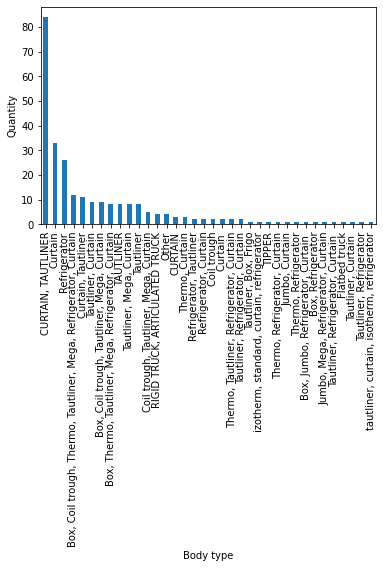

In [42]:
ax = df8b.plot.bar(x='BODY_TYPE', y='val', rot=90)
pl.xlabel("Body type")
pl.ylabel("Quantity")

In [43]:
df9 = df.groupby(['BODY_TYPE'], as_index=False).EuroForKM.mean()
df9.sort_values('EuroForKM')

,BODY_TYPE,EuroForKM
35,"tautliner, curtain, isotherm, refrigerator",0.464253
19,"Refrigerator, Tautliner",0.641989
32,"Thermo, Refrigerator, Curtain",0.756348
14,"Jumbo, Mega, Refrigerator, Curtain",0.766787
0,"Box, Coil trough, Tautliner, Mega, Curtain",0.776186
34,"izotherm, standard, curtain, refrigerator",0.808052
11,"Curtain, Tautliner",0.816815
16,"RIGID TRUCK, ARTICULATED TRUCK",0.855934
15,Other,0.858837
8,"Coil trough, Tautliner, Mega, Curtain",0.881969


In [44]:
import numpy as np
df.groupby('BODY_TYPE')['EuroForKM'].agg(np.median)
df9.sort_values('EuroForKM')

,BODY_TYPE,EuroForKM
35,"tautliner, curtain, isotherm, refrigerator",0.464253
19,"Refrigerator, Tautliner",0.641989
32,"Thermo, Refrigerator, Curtain",0.756348
14,"Jumbo, Mega, Refrigerator, Curtain",0.766787
0,"Box, Coil trough, Tautliner, Mega, Curtain",0.776186
34,"izotherm, standard, curtain, refrigerator",0.808052
11,"Curtain, Tautliner",0.816815
16,"RIGID TRUCK, ARTICULATED TRUCK",0.855934
15,Other,0.858837
8,"Coil trough, Tautliner, Mega, Curtain",0.881969


In [45]:
Correlation_EPALE_EuroKm = df['EPALE'].corr(df['EuroForKM'])
Correlation_EPALE_EuroKm

0.025868540280978077

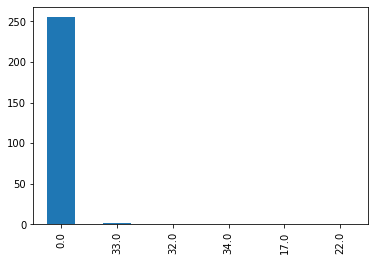

In [46]:
df13 = df['EPALE'].value_counts()
ax = df13.plot.bar(x='EPALE', y='val', rot=90)

In [47]:
Correlation_TIMOID_EuroKm = df['TIMO_ID'].corr(df['EuroForKM'])
Correlation_TIMOID_EuroKm

0.09720874357616784